In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set()

## 5.13 核密度估计
`GMM`是一个聚类和密度评估器的混合体。密度评估器是一种利用$D$维数据集生成$D$维概率分布估计的算法。`GMM`算法用不同高斯分布的加权汇总来表示概率分布估计。`核密度估计`(kernel density estimation，KDE)算法将高斯混合理念扩展到了`逻辑极限`(logical extreme)。它通过对每个点生成高斯分布的混合成分，获得本质上是无参数的密度评估器。

### 5.13.1 KDE的由来：直方图
`密度评估器`是一种寻找数据集生成概率分布模型的算法。你可能很熟悉一维数据的密度估计，直方图就是一个简单的密度评估器。直方图将数据分成若干区间，统计落入每个区间内的点的数量，然后用直观的方式将结果可视化。

下面创建两组服从正态分布的数据：

In [3]:
def make_data(N, f=0.3, rseed=1):
    rand = np.random.RandomState(rseed) 
    x = rand.randn(N) 
    x[int(f * N):] += 5
    return x

x = make_data(1000)

前面已经介绍过，基于计数的标准直方图可以用`plt.hist()`函数来生成。只要确定直方图的`density`参数，就可以得到一个正态分布直方图。在这个直方图中，区间的高度并不反映统计频次，而是反映概率密度(`图5-140`)：

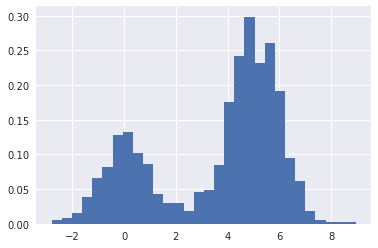

In [5]:
hist = plt.hist(x, bins=30, density=True)
plt.show()

值得注意的是，在区间不变的条件下，这个标准化(计算概率密度)只是简单地改变了`y`轴的比例，相对高度仍然与频次直方图一致。标准化是为了让直方图的总面积等于`1`，可以通过检查直方图函数的输出结果来确认这一点：

In [6]:
density, bins, patches = hist 
widths = bins[1:] - bins[:-1] 
(density * widths).sum()

1.0

使用直方图作为密度评估器时需要注意的是，区间大小和位置的选择不同，产生的统计特征也不同。例如，如果只看数据中的 20 个点，选择不同的区间将会出现完全不同的解读方式(直方图)，如以下示例(`图5-141`)：

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


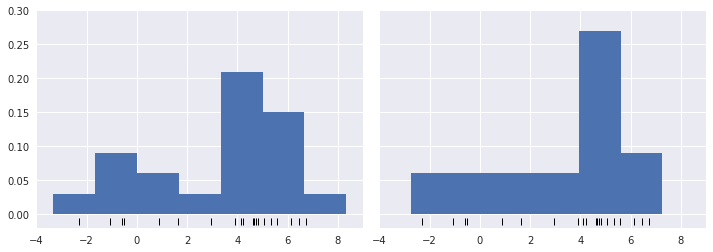

In [7]:
x = make_data(20) 
bins = np.linspace(-5, 10, 10)

fig, ax = plt.subplots(1, 2, figsize=(12, 4), 
                       sharex=True, sharey=True, 
                       subplot_kw={'xlim':(-4, 9), 'ylim':(-0.02, 0.3)}) 

fig.subplots_adjust(wspace=0.05) 

for i, offset in enumerate([0.0, 0.6]):
    ax[i].hist(x, bins=bins + offset, normed=True)
    ax[i].plot(x, np.full_like(x, -0.01), '|k', markeredgewidth=1)
    
plt.show()